/home/ming/mambaforge/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


2024-07-11 21:33:09,188 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/ming/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/home/ming/mambaforge/envs/climada_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


2024-07-11 21:33:11,920 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/ming/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2024-07-11 21:33:12,720 - climada.hazard.tc_tracks - WARNING - 19 storm events are discarded because no valid wind/pressure values have been found: 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, ...


/home/ming/mambaforge/envs/climada_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


Number of tracks: 33
2024-07-11 21:33:15,165 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/ming/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/home/ming/mambaforge/envs/climada_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


2024-07-11 21:33:16,060 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/ming/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/home/ming/mambaforge/envs/climada_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


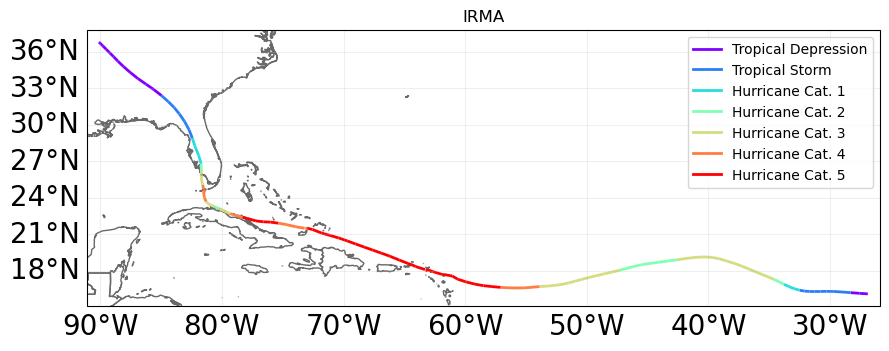

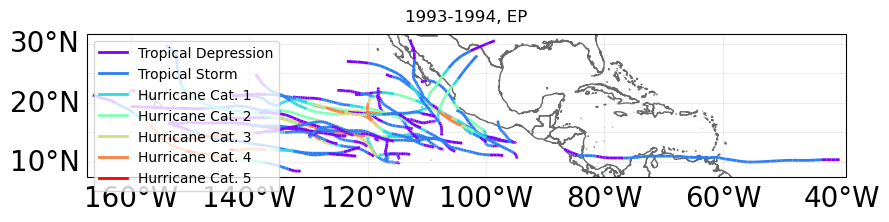

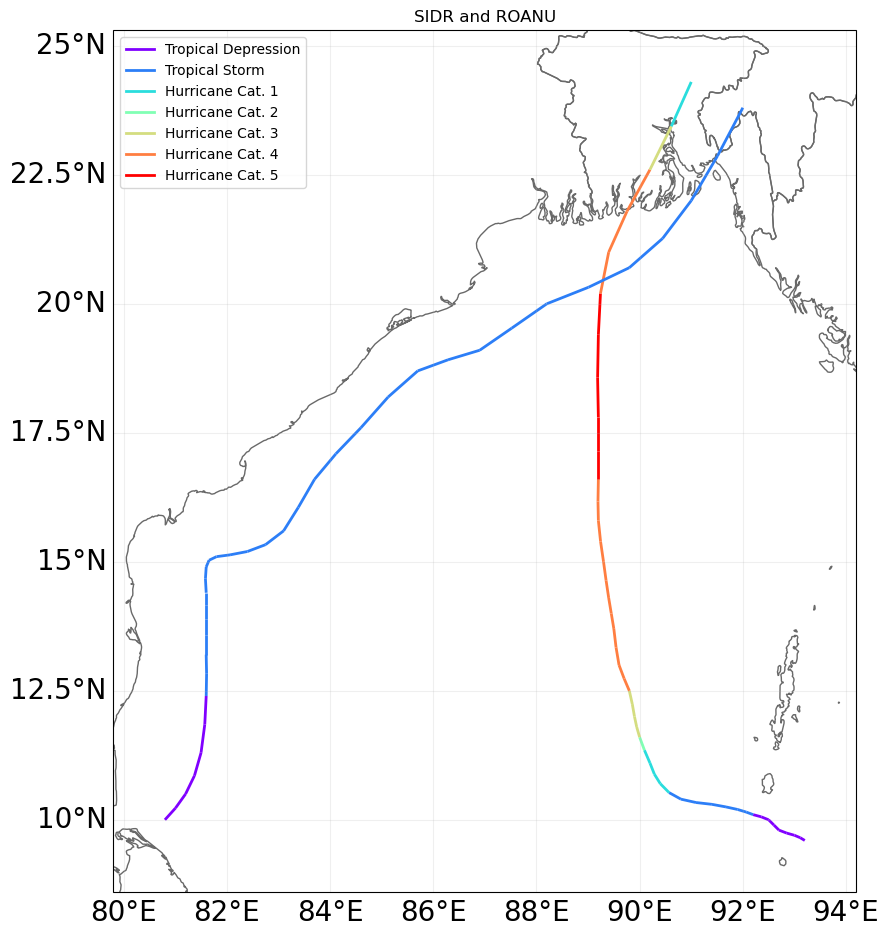

In [1]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
ax = tr_irma.plot();
ax.set_title('IRMA') # set title

# other ibtracs selection options
from climada.hazard import TCTracks
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs = TCTracks.from_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

track1 = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together
ax = track1.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

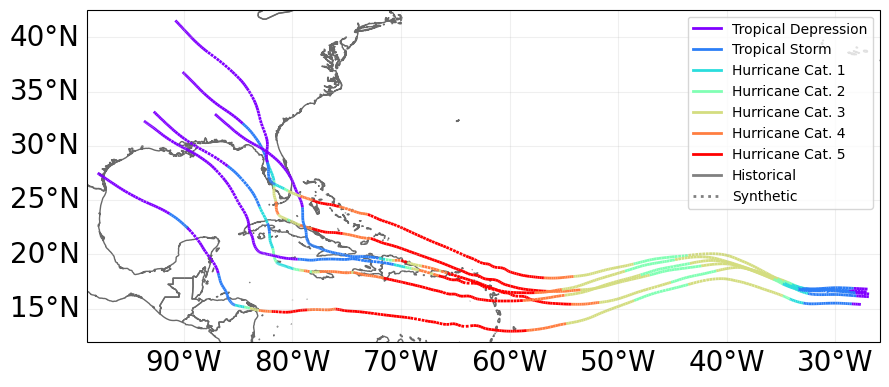

In [2]:
# here we use tr_irma retrieved from IBTrACS with the function above
# select number of synthetic tracks (nb_synth_tracks) to generate per present tracks.
tr_irma.equal_timestep()
tr_irma.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_irma.plot();
# see more configutration options (e.g. amplitude of max random starting point shift in decimal degree; max_shift_ini)


In [3]:
tr_irma.data[-1] # last synthetic track. notice the value of orig_event_flag and name


<xarray.Dataset>
Dimensions:                 (time: 349)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T1...
    lon                     (time) float64 -27.64 -27.8 -27.96 ... -97.81 -97.93
    lat                     (time) float64 15.39 15.41 15.42 ... 27.41 27.49
Data variables:
    radius_max_wind         (time) float64 60.0 60.0 60.0 ... 60.0 60.0 60.0
    radius_oci              (time) float64 180.0 180.0 180.0 ... 350.0 350.0
    max_sustained_wind      (time) float64 30.0 30.67 31.33 ... 15.0 14.99 14.96
    central_pressure        (time) float64 1.008e+03 1.008e+03 ... 1.005e+03
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    time_step               (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    basin                   (time) <U2 'NA' 'NA' 'NA' 'NA' ... 'NA' 'NA' 'NA'
    on_land                 (time) bool False False False ... False True True
    dist_since_lf           (time) float64 nan nan nan nan ... nan 7.605 22.71
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    orig_event_flag:          False
    data_provider:            ibtracs_usa
    category:                 5
    name:                     IRMA_gen5
    sid:                      2017242N16333_gen5
    id_no:                    2017242016333.05

In [5]:
first_track = tr_irma.data[0]
first_track.time_step

<xarray.DataArray 'time_step' (time: 349)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lon      (time) float64 -26.9 -27.13 -27.36 -27.59 ... -89.9 -90.0 -90.1
    lat      (time) float64 16.1 16.12 16.13 16.15 16.16 ... 36.5 36.6 36.7 36.8

In [6]:
first_track.time

<xarray.DataArray 'time' (time: 349)>
array(['2017-08-30T00:00:00.000000000', '2017-08-30T01:00:00.000000000',
       '2017-08-30T02:00:00.000000000', ..., '2017-09-13T10:00:00.000000000',
       '2017-09-13T11:00:00.000000000', '2017-09-13T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lon      (time) float64 -26.9 -27.13 -27.36 -27.59 ... -89.9 -90.0 -90.1
    lat      (time) float64 16.1 16.12 16.13 16.15 16.16 ... 36.5 36.6 36.7 36.8

In [11]:
first_track.max_sustained_wind.groupby('time.day').max()

<xarray.DataArray 'max_sustained_wind' (day: 15)>
array([100.        , 100.        , 100.        , 123.33333333,
       155.        , 155.        , 150.        , 144.        ,
       145.        , 115.        ,  80.        ,  35.        ,
        15.        ,  54.        ,  99.        ])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 30 31

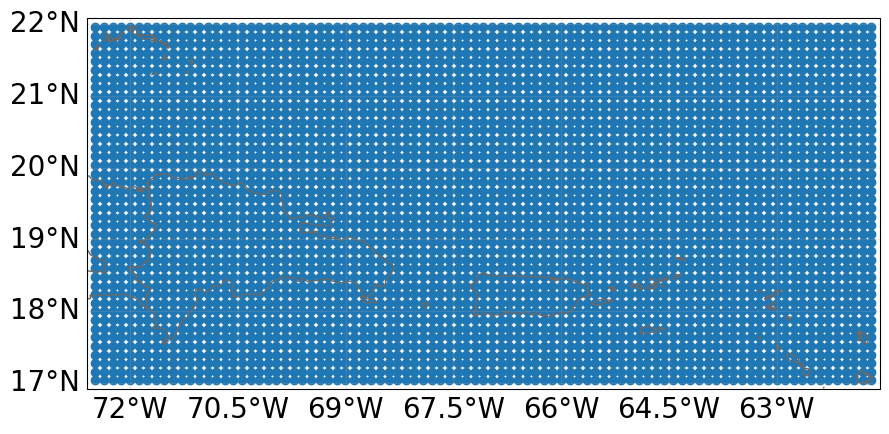

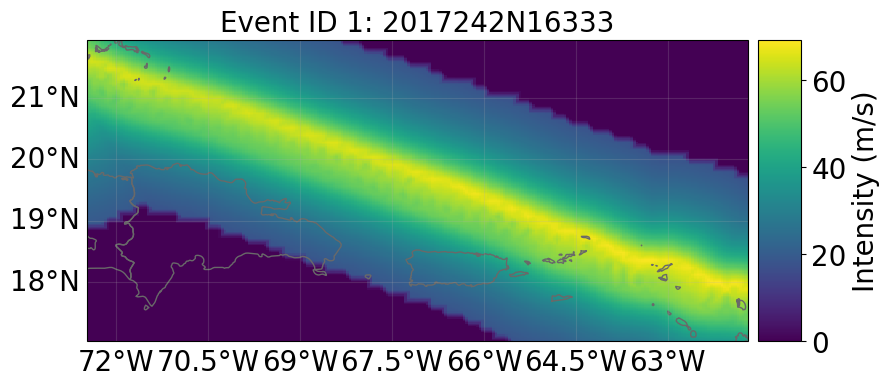

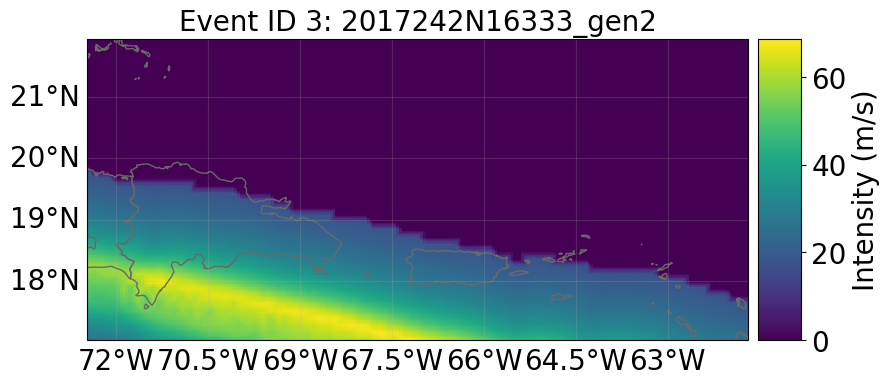

In [12]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.12)
cent.check()
cent.plot();

# construct tropical cyclones
tc_irma = TropCyclone.from_tracks(tr_irma, centroids=cent)
# tc_irma = TropCyclone.from_tracks(tr_irma)  # try without given centroids. It might take too much space of your memory
# and then the kernel will be killed: So, don't use this function without given centroids!
tc_irma.check()
tc_irma.plot_intensity('2017242N16333');  # IRMA
tc_irma.plot_intensity('2017242N16333_gen2');  # IRMA's synthetic track 2


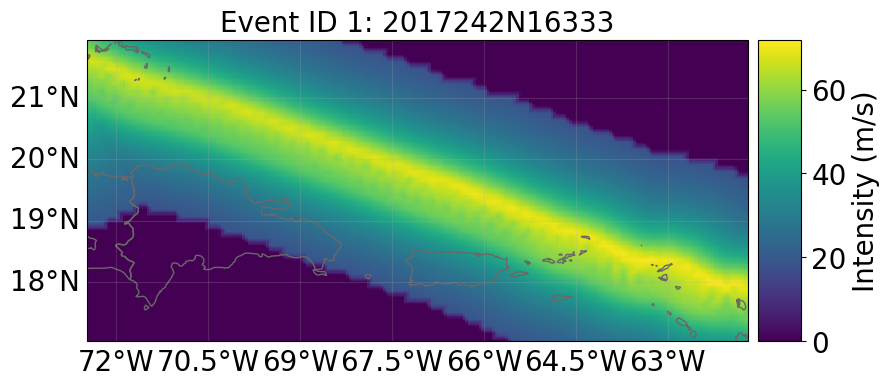

In [13]:
# an Irma event-like in 2055 under RCP 4.5:
tc_irma = TropCyclone.from_tracks(tr_irma, centroids=cent)
tc_irma_cc = tc_irma.apply_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_irma_cc.plot_intensity('2017242N16333');
